GA: Tavelling Salesman

"El problema del viajero"

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Generation 1 1045.5971291045623 [ 0 22 24 25 26  1  7 15 20 13 12 29 23 16 17 18 21  8 11 19  5  9 28  6
  3 14  2 27  4 10]
Generation 2 1045.5971291045623 [ 0 22 24 25 26  1  7 15 20 13 12 29 23 16 17 18 21  8 11 19  5  9 28  6
  3 14  2 27  4 10]
Generation 3 1045.5971291045623 [ 0 22 24 25 26  1  7 15 20 13 12 29 23 16 17 18 21  8 11 19  5  9 28  6
  3 14  2 27  4 10]
Generation 4 1045.5971291045623 [ 0 22 24 25 26  1  7 15 20 13 12 29 23 16 17 18 21  8 11 19  5  9 28  6
  3 14  2 27  4 10]
Generation 5 1039.208918472771 [ 0 21 16 27 17 23  4 22 12  5 15 14  3 29  7 20  8 11 19 13  1 26 10  6
 18  2 25 28 24  9]
Generation 6 962.0307647844731 [ 0  5 29  2 27  7 17 10  8 20  9 19 14 24 15 12  4 22  1 11 18  3 25 26
 13 21  6 16 28 23]
Generation 7 962.0307647844731 [ 0  5 29  2 27  7 17 10  8 20  9 19 14 24 15 12  4 22  1 11 18  3 25 26
 13 21  6 16 28 23]
Generation 8 962.0307647844731 [ 0  5 29  2 27  7 17 10  8 20  9 19 14 24 15 12  4 22  1 11 18  3 25 26
 13 21  6 16 28 23]
Gene

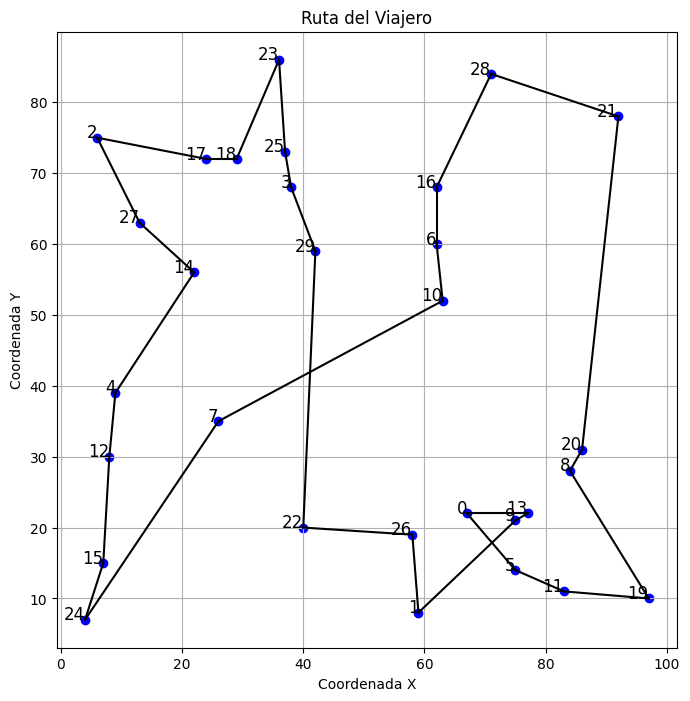

In [2]:
class GeneticAlgorithm_Salesman_Travelling:
    
    def __init__(self,N=30,popsize=1000,NGenerations=500,probCrossover=0.7,probMutation=0.4):
        self.N = N
        self.cities = np.zeros((N,2))
        self.init_cities()
        self.popsize = popsize
        self.NGenerations = NGenerations
        self.population = np.zeros((self.popsize,N),int)
        self.fitness = np.zeros((self.popsize))
        self.probCrossover = probCrossover
        self.probMutation = probMutation
        self.elite = np.zeros((N),int)
        self.eliteFit = None
        
        
        
    def init_cities(self):
        for i in range(self.N):
            self.cities[i] = [np.random.randint(0,100), np.random.randint(0,100)]
            
    def init_population(self):
        
        for i in range (self.popsize):
            self.population[i,0] = 0
            self.population[i, 1:self.N] = np.random.permutation(np.arange(1,self.N)).astype(int)
            self.fitness[i] = self.fitness_individual(self.population[i])
            
    def distance_matrix(self):
        # Inicializar la matriz de distancias como una matriz 2D de ceros
        self.dist_matrix = np.zeros((self.popsize, self.popsize))
        
        # Calcular la distancia euclidiana entre cada par de puntos
        for i in range(self.popsize):
            for j in range(self.popsize):
                if i != j:
                    self.dist_matrix[i][j] = np.linalg.norm(np.array(self.puntos[i]) - np.array(self.puntos[j]))
        
        # Imprimir la matriz de distancias con el formato solicitado
        print("Matriz de distancias:")
        for fila in self.dist_matrix:
            formatted_row = ["{:06.2f}".format(dist) for dist in fila]
            print(" ".join(formatted_row))  
                 
    def mutation(self,ind):
        while True:
            i1 = np.random.randint(1,self.N)
            i2 = np.random.randint(1,self.N)
            if i1!=i2: break
        ind[i1],ind[i2] = ind[i2],ind[i1]
        return ind
    
    def getDistance(self,a,b):
        city1 = self.cities[a]
        city2 = self.cities [b]
        return np.linalg.norm( city1 - city2 )

            
    def fitness_individual(self,ind):
        distancia = 0
        for i in range(self.N-1):
            distancia += self.getDistance(ind[i],ind[i+1])
        distancia += self.getDistance(ind[0],ind[self.N-1])
        return distancia
    
        
    def tournament_selection(self):
        i1 = np.random.randint(self.popsize)
        i2 = np.random.randint(self.popsize)
        if self.fitness[i1] <= self.fitness[i2]:
            return i1
        else:
            return i2
    
    def crossover(self,par1,par2):
        offspring = np.ones((self.N),int)*-1
        pc1 = pc2 = 0
        while True:
            pc1 = np.random.randint(1,self.N/2)
            pc2 = np.random.randint(self.N/2,self.N)
            if pc1!=pc2: break
        offspring[pc1:pc2] = par1[pc1:pc2]
        positions_missing = []
        values_missing = []
        for i in range(0,pc1):
            if par2[i] not in offspring:
                offspring[i] = par2[i]
            else: 
                positions_missing.append(i)
        for i in range(pc2,self.N):
            if par2[i] not in offspring:
                offspring[i] = par2[i]
            else: 
                positions_missing.append(i)

        for i in range(1,self.N):
            if par2[i] not in offspring:
                values_missing.append(par2[i])
        for i,v in zip(positions_missing,values_missing):
            offspring[i] = v

        return offspring
    
    def update_elite(self):
        i = np.argmin(self.fitness)
        if self.eliteFit is None or self.fitness[i]<self.eliteFit:
            self.elite = np.copy(self.population[i])
            self.eliteFit = self.fitness[i]
        else:
            i = np.random.randint(self.popsize)
            self.population[i,:] = self.elite
            self.fitness[i] = self.eliteFit
            
    def plot_route(self, route):
        plt.figure(figsize=(8, 8))
        # Trazar las ciudades
        for i in range(self.N):
            plt.scatter(self.cities[i, 0], self.cities[i, 1], c='blue')
            plt.text(self.cities[i, 0], self.cities[i, 1], str(i), fontsize=12, ha='right')

        # Trazar las conexiones entre las ciudades
        for i in range(self.N - 1):
            start_city = route[i]
            end_city = route[i + 1]
            plt.plot([self.cities[start_city, 0], self.cities[end_city, 0]],
                    [self.cities[start_city, 1], self.cities[end_city, 1]], 'k-')

        # Conectar la última ciudad con la primera para cerrar el ciclo
        plt.plot([self.cities[route[-1], 0], self.cities[route[0], 0]],
                [self.cities[route[-1], 1], self.cities[route[0], 1]], 'k-')
        
        plt.title('Ruta del Viajero')
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.grid(True)
        plt.show()
        
    def exec(self):
        self.init_population()
        self.update_elite()
        k = 0
        while k<self.NGenerations :                    
            k += 1
            offspring = np.zeros((self.popsize,self.N),int)
            offspringFit = np.zeros((self.popsize))
            for i in range(self.popsize):
                i1 = self.tournament_selection()
                i2 = self.tournament_selection()
                if np.random.rand() <= self.probCrossover:
                    of = self.crossover(self.population[i1],self.population[i2])
                else:
                    of = np.copy(self.population[i1,:])
                if np.random.rand() <= self.probMutation: 
                    of = self.mutation(of)
                offspring[i] = of
                offspringFit[i] = self.fitness_individual(of)
            self.population = offspring
            self.fitness = offspringFit
            self.update_elite()
            print('Generation',k,self.eliteFit,self.elite)
        self.plot_route(self.elite)
        
    
    
ga1 = GeneticAlgorithm_Salesman_Travelling()
ga1.exec()      
